## Codice usando i dati presenti nel  [paper(pag 18, paragrafo 4.2)](https://drive.google.com/file/d/1YBFS7FW81_pyuryAb5ISiofgLkT7Gp-P/view?usp=sharing).

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
sys.path.append('../lib/')
from utils import *
import numpy as np 

mu0 = 0.0
var0 = 1

x = np.array([-2.296, -0.216, -0.082, 0.231, 1.127, 1.164, 1.189, 1.236, 1.272, 1.373])

In [2]:
Nodes = [f'a{i}' for i in range(-7, 2)]

C_G = nx.complete_graph(Nodes)
W_G = nx.Graph()

In [3]:
A = []

link_A = 0

for edge in C_G.edges:
    node1, node2 = edge
    if node1[0] == node2[0] == 'a':
        pi = int(node1[1:])
        pj = int(node2[1:])
        w = -2**(pi+pj)*fAA(var0)
        
        link_A += 1
        A.append(w)
        W_G.add_edge(node1, node2, bij=w)

In [4]:
np.sum(-(x-mu0)**2/(var0)**2)

-14.447911999999999

In [5]:
node_weights = np.zeros(W_G.number_of_nodes())
for i, node in enumerate(C_G.nodes):
    p = int(node[1:])
    w = -np.sum(2**(p) * fA(x, mu0, var0) + (2**(2*p - 1) - 2**(p)*mu0)*fAA(var0))
    
    node_weights[i] = w

nx.set_node_attributes(W_G, {a:{'ai':b} for a, b in zip(C_G.nodes, node_weights)})

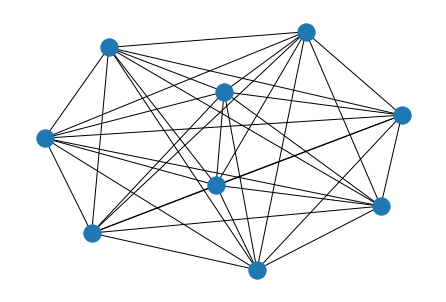

In [6]:
nx.draw(W_G)

In [21]:
from dwave.system import DWaveSampler, EmbeddingComposite, DWaveCliqueSampler
import dimod
import dwave.inspector

bqm = dimod.from_networkx_graph(W_G, vartype='BINARY', edge_attribute_name='weight', node_attribute_name='weight')
bqm.normalize()

sampleset = EmbeddingComposite(DWaveSampler()).sample(bqm, num_reads=1000, chain_strength=-100) #

In [22]:
sampleset.variables

Variables(['a-1', 'a-2', 'a-3', 'a-4', 'a-5', 'a-6', 'a-7', 'a0', 'a1'])

In [23]:
theta = np.zeros(len(sampleset.record))
phi = np.zeros(len(sampleset.record))

for k, rec in enumerate(sampleset.record):
    states = rec[0]
    mu = 0
    var = 0
    for i, sol in enumerate(states):
        p = int(sampleset.variables[i][1:])
        if sampleset.variables[i][0] == 'a':
            mu = mu + 2**(p) * sol
        else:
            var = var + 2**(p) * sol
            
    theta[k] = mu
    phi[k] = var

(array([230.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 193.]),
 array([1.78125   , 2.00234375, 2.2234375 , 2.44453125, 2.665625  ,
        2.88671875, 3.1078125 , 3.32890625, 3.55      , 3.77109375,
        3.9921875 ]),
 <BarContainer object of 10 artists>)

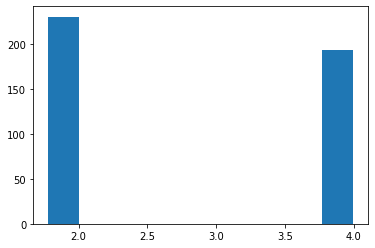

In [24]:
plt.hist(theta, bins='auto')

(array([427.]), array([-0.5,  0.5]), <BarContainer object of 1 artists>)

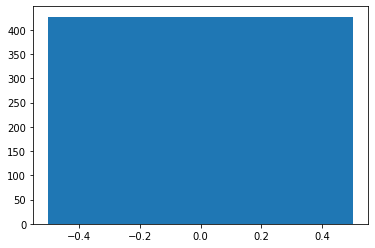

In [11]:
plt.hist(phi, bins='auto')

In [25]:
dwave.inspector.show(sampleset)

'http://127.0.0.1:18000/?problemId=08ef443f-338c-4aec-92c4-172f56ab381c'